# Load and Prepare Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def run_citrus_analysis():
    #  Load and Prepare Data 
    print("Step 1: Loading and Preparing Data ")
    
    try:
        # Load the dataset using pandas
        citrus_df = pd.read_csv('../data/citrus.csv')
    except FileNotFoundError:
        print("Error: '../data/citrus.csv' not found. Make sure the file is in the 'data' directory.")
        return

    # Convert the DataFrame to a NumPy array for numerical operations
    # The first column 'name' is categorical, so we'll work with diameter and weight
    data = citrus_df[['diameter', 'weight']].to_numpy()

    # Using Slice Notation to select data
    # Oranges are the first 5000 rows
    oranges_data = data[:5000, :]
    # Grapefruits are the next 5000 rows
    grapefruit_data = data[5000:, :]

    # Creating specific arrays for diameter and weight for each fruit
    orange_diameter = oranges_data[:, 0]
    orange_weight = oranges_data[:, 1]

    grapefruit_diameter = grapefruit_data[:, 0]
    grapefruit_weight = grapefruit_data[:, 1]

    print("--- First 5 entries of each array ---")
    print(f"Orange Diameter: {orange_diameter[:5]}")
    print(f"Orange Weight:   {orange_weight[:5]}")
    print(f"Grapefruit Diameter: {grapefruit_diameter[:5]}")
    print(f"Grapefruit Weight:   {grapefruit_weight[:5]}")
    print("\n" + "="*50 + "\n")
    return orange_diameter, orange_weight, grapefruit_diameter, grapefruit_weight


results = run_citrus_analysis()

Step 1: Loading and Preparing Data 
--- First 5 entries of each array ---
Orange Diameter: [2.96 3.91 4.42 4.47 4.48]
Orange Weight:   [86.76 88.05 95.17 95.6  95.76]
Grapefruit Diameter: [7.63 7.69 7.72 7.77 7.84]
Grapefruit Weight:   [126.79 133.98 135.56 135.62 136.63]




# Visualize the Data

Step 1: Loading and Preparing Data 
--- First 5 entries of each array ---
Orange Diameter: [2.96 3.91 4.42 4.47 4.48]
Orange Weight:   [86.76 88.05 95.17 95.6  95.76]
Grapefruit Diameter: [7.63 7.69 7.72 7.77 7.84]
Grapefruit Weight:   [126.79 133.98 135.56 135.62 136.63]


Step 2: Visualizing the Data


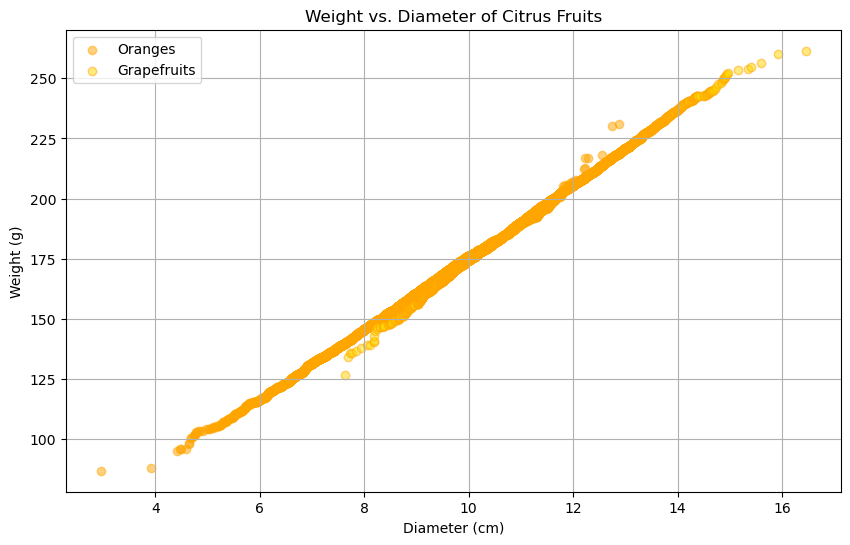

In [3]:
orange_diameter, orange_weight, grapefruit_diameter, grapefruit_weight = run_citrus_analysis()

def run_citrus_visualization(orange_diameter, orange_weight, grapefruit_diameter, grapefruit_weight):
    print("Step 2: Visualizing the Data")
    plt.figure(figsize=(10, 6))
    plt.scatter(orange_diameter, orange_weight, label='Oranges', color='orange', alpha=0.5)
    plt.scatter(grapefruit_diameter, grapefruit_weight, label='Grapefruits', color='gold', alpha=0.5, edgecolors='orange')
    plt.title('Weight vs. Diameter of Citrus Fruits')
    plt.xlabel('Diameter (cm)')
    plt.ylabel('Weight (g)')
    plt.legend()
    plt.grid(True)
    plt.savefig('weight_vs_diameter.png') # Save the plot

    

run_citrus_visualization(orange_diameter, orange_weight, grapefruit_diameter, grapefruit_weight) 

## This Visualization Help us with:
- Compare the physical characteristics of the two fruit types.
- Identify patterns or differences in size and weight between oranges and grapefruits.
- Detect outliers or unusual data points that may need further investigation.
- Support further analysis, such as regression or classification, by showing how the variables are distributed.

# Implement Linear Regression with NumPy

 Step 3: Implementing Linear Regression from Scratch 
The equation for the orange regression line is: y = 14.80x + 27.39


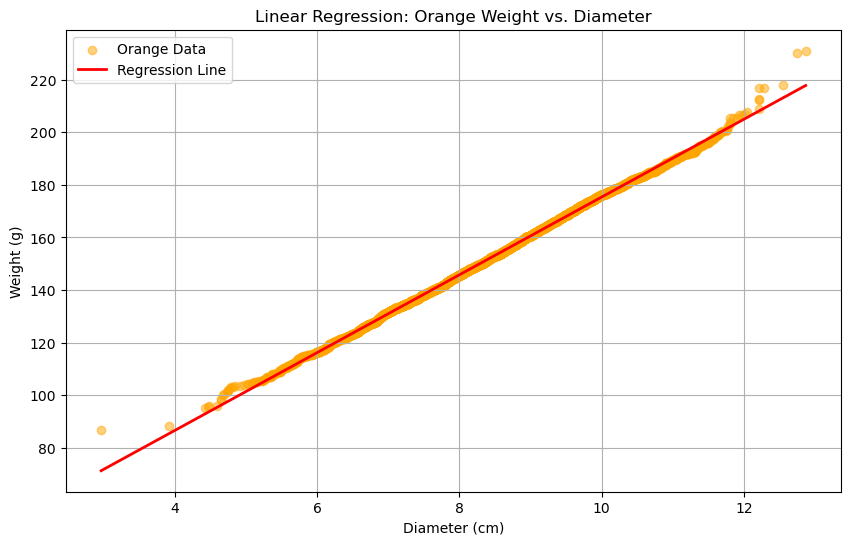

In [4]:
print(" Step 3: Implementing Linear Regression from Scratch ")

# We will build the model for oranges
X = orange_diameter
Y = orange_weight
N = len(X)

# Calculate the components of the regression formulas
sum_xy = np.sum(X * Y)
sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_x2 = np.sum(X**2)

# Calculate the slope (a) and intercept (b) of the regression line
# Formula for slope: a = (N*sum(XY) - sum(X)*sum(Y)) / (N*sum(X^2) - (sum(X))^2)
a_numerator = N * sum_xy - sum_x * sum_y
a_denominator = N * sum_x2 - (sum_x)**2
slope = a_numerator / a_denominator

# Formula for intercept: b = mean(Y) - a*mean(X)
mean_x = np.mean(X)
mean_y = np.mean(Y)
intercept = mean_y - slope * mean_x

print(f"The equation for the orange regression line is: y = {slope:.2f}x + {intercept:.2f}")

# Create the regression line for plotting
x_line = np.array([np.min(X), np.max(X)])
y_line = slope * x_line + intercept

# Plot the original data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Orange Data', color='orange', alpha=0.5)
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Orange Weight vs. Diameter')
plt.xlabel('Diameter (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid(True)
plt.savefig('orange_regression.png') # Save the plot


## What is Linear Regression and Why Is It Used in This Project?

Linear regression is a statistical method used to find a mathematical relationship between two numerical variables—in this case, the diameter and weight of citrus fruits. It allows us to predict the value of one variable (such as weight) based on the value of another (diameter).

In this project, linear regression is used to:

- **Model the relationship between diameter and weight for oranges.**
- **Predict the weight of an orange if we know its diameter.**
- **Analyze whether there is a clear trend between these two physical characteristics.**
- **Provide a basis for comparison with other species (like grapefruit) in future analyses.**

This helps us better understand the behavior of the data and can be useful for practical applications such as classification, quality control, or making estimates in